<a href="https://colab.research.google.com/github/mratanusarkar/Learning-DeepLearning/blob/main/Neural%20Networks%20-%20Zero%20to%20Hero/building%20neural%20networks/03.%20neural%20networks%20-%20mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing code from the previous notebook

In [1]:
!git clone https://github.com/mratanusarkar/Learning-DeepLearning.git &> /dev/null
%cd /content/Learning-DeepLearning/Neural\ Networks\ -\ Zero\ to\ Hero
!python setup.py install &> /dev/null

/content/Learning-DeepLearning/Neural Networks - Zero to Hero


In [2]:
from micrograd.engine import Value
from micrograd.visualize import draw_dot

In [3]:
import random
random.seed(2023)

# MLP Class

In [4]:
# now that we have a Neuron and a Layer class in hand, let's try to connect multiple layers together to form a MLP
# There are so many different type of neural network architectures out there, and every class or types of neural networks are good at specific tasks
# based on the designs and architectures, we have so many types of neural networks, such as ANN, CNN, RNN, Transformers, and so on... 

# let's start building a MLP class
# MLP stands for "multilayer perceptron". It is a fully connected class of feedforward artificial neural network (ANN)

In [5]:
# in a MLP, the layers feed into each other sequenially

Here is an illustration of a simple MLP. <br>
Bringing it back here for reference:

for our example case, we can buil a MLP with the following layers:
- input layer: with 3 inputs (these are not neurons, just x1, x2, x3)
- hidden layer 1: a neural layer with 4 neurons
- hidden layer 2: a neural layer with 4 neurons
- output layer: a neural layer with 1 neuron

[see: [05. expression graph - a neuron.ipynb](https://github.com/mratanusarkar/Learning-DeepLearning/blob/main/Neural%20Networks%20-%20Zero%20to%20Hero/building%20micrograd/05.%20expression%20graph%20-%20a%20neuron.ipynb) for reference]

![neural_net2.jpeg](https://cs231n.github.io/assets/nn1/neural_net2.jpeg)

In [6]:
# as before, let us build our own version of the MLP class with more understandable names and the expression graphs having labels
# and let us also keep what Karpathy had built in his micrograd (and ofcourse those conventions are used in torch api and other ML codebases)
# I will call my version of classes as "Noob", because "I am noob!"

In [7]:
# Karpathy's micrograd Neuron, Layer and MLP for Noobs!

class NoobNeuron:

    def __init__(self, n_inputs, label='') -> None:
        """
        Karpathy's micrograd Neuron for Noobs!
        Constructs a neuron that has `n_inputs` number of inputs and assigns random weights & bias to the neuron

        Parameters
        ----------
            n_inputs : int
                number of inputs entering into the neuron
            
            label : str
                (optional) the name or label of the Neuron
        """

        self.label = label
        self.w = [Value(random.uniform(-1,1)) for _ in range(n_inputs)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x) -> Value:
        """
        Takes in a list of all `n_inputs` number of input `x values`, 
        Computes the body by doing `sum(w.x + b)` and 
        Passes the result through a non-linear activation function to return output

        x = [x1, x2, x3, ..., xn],
        
        and we already have w's and b who's values were randomly assigned.
        w = [w1, w2, w3, ..., wn]
        b = bias

        so, the output would be as follows:
        out = f((x1*w1 + x2*w2 + ... + xn*wn) + b),
        or `out = f(Σ(w.x) + b)`

        where, f() is the activation function (tanh in this case)

        Parameters
        ----------
            x : list(float)
                the input values or the x = [x1, x2, x3, ..., xn]

            return : Value
                returns the output value
        """

        sum = Value(0.0, label=f'{self.label} : sum')
        for i, (xi, wi) in enumerate(zip(x, self.w)):
            # inputs
            x = xi if isinstance(xi, Value) else Value(xi)
            x.label=f'{self.label} : x{i}'

            # weights
            w = wi;         w.label=f'{self.label} : w{i}'

            # dendrites of the neuron (inputs weighted)
            den = x * w;    den.label=f'{self.label} : den{i}'

            # sum of dendrite signals inside cell body
            sum = sum + den;

        # bias of the neuron
        b = self.b;     b.label=f'{self.label} : b'

        # bias gets added inside the body
        body = sum + b;     body.label=f'{self.label} : body'

        # the net signal passes through a non-linear activation function
        out = body.tanh()
        out.label=f'{self.label} : out'

        return out

class NoobLayer:

    def __init__(self, n_neurons_prev, n_neurons_curr, label='') -> None:
        """
        Karpathy's micrograd Layer for Noobs!
        Constructs a Layer, i.e array of Neurons, that has `n_neurons_curr` number of neurons in it.
        Each of the `n_neurons_curr` number of neurons in this layer has `n_neurons_prev` number of inputs and one output each.

        So, in total, we have `n_neurons_prev * n_neurons_curr` number of neural link lines feeding into the layer
        and `n_neurons_curr` number of links going out of the layer

        Parameters
        ----------
            n_neurons_prev : int
                number of neurons in the previous layer, or number of neurons entering into this current layer
            
            n_neurons_curr : int
                number of neurons in this current layer, or number of output lines exiting this layer
            
            label : str
                (optional) the name or label of the Layer, 
                where each Neuron in the Layer will be labeled as: `{label} N:{i}`
        """
        
        self.label = label
        self.neurons = [NoobNeuron(n_neurons_prev, f'{self.label} N:{i}') for i in range(n_neurons_curr)]

    def __call__(self, x) -> list[Value]:
        """
        Signals from the previous layer enters into this layer,
        and the output from all the previous layer's neurons are passed into each neuron of this current layer
        the output of each of the neurons in this current layer is computed
        and the result of the same is returned in an array

        If you have n neurons in this layer, your out will be an array of n
        x = [x1, x2, x3, ..., xn]

        Parameters
        ----------
            x : list(float)
                output of all `n_neurons_prev` neurons from the prev layer, that are entering into this layer.
            
            return : list(Value)
                returns a list of output values
        """

        outs = [n(x) for n in self.neurons]
        return outs

class NoobMLP:
    
    def __init__(self, n_inputs, neurons_per_layer, label='') -> None:
        """
        Karpathy's micrograd MLP for Noobs!
        Constructs a fully connected Multilayer Perceptron.

        Takes in number of inputs to the neural network `n_inputs`, and number of hidden & output layers `neurons_per_layer`,
        and creates a MLP with Layers and Neurons as per input specification, and assigns random weights and biases to the MLP.

        Parameters
        ----------
            n_inputs : int
                number of inputs to the entire MLP
            
            neurons_per_layer : list(int)
                a list specifying the number of neurons in each layer of the neural network
            
            label : str
                (optional) the name or label of the entire MLP network (incase you want to create multiple networks and connect them) 
                each Neuron in the Layer will be labeled as: `{label} L:{i} N:{i} : <node-type>`,
                
                where: 
                - L is Layer
                - N is Neuron
                - <node-type> can be `w`, `b`, `body`, `sum`, `dendrite`, etc
                
        """

        self.label = label
        layer_sizes = [n_inputs] + neurons_per_layer
        self.layers = [NoobLayer(layer_sizes[i], layer_sizes[i+1], f'{self.label} L:{i+1}') for i in range(len(neurons_per_layer))]

    def __call__(self, x) -> list[Value]:
        """
        An entire forward pass of the MLP,
        Where it creates and forms the entire neural network and the expression graph!

        pass in your input x that you want to feed to this MLP neural network, where
        x = [x1, x2, x3, ..., xn]

        Parameters
        ----------
            x : list(float)
                input features x = [x1, x2, x3, ..., xn]
            
            return : list(Value)
                an entire forward pass is made to the MLP with the given inputs, and the existing w&b of the network
                and it returns the output from the last output layer
        """

        # call the layers sequentially and make a forward pass
        for layer in self.layers:
            x = layer(x)
        return x

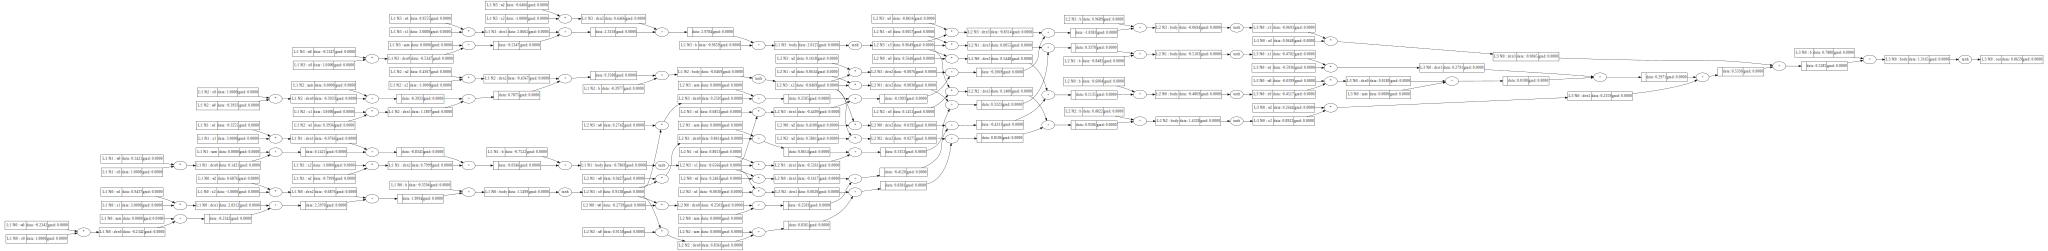

In [8]:
# creating a neural network following the architecture in the above image
x = [1.0, 3.0, -1.0]
n = NoobMLP(3, [4, 4, 1])
out = n(x)
draw_dot(out[0])

In [9]:
# and... as usual... here goes much more efficient and optimized implementation

In [10]:
# original micrograd Neuron that is similar to PyTorch API

class Neuron:

    def __init__(self, nin) -> None:
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # out = f( sum(weights.input_xs + bias) )
        body = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = body.tanh()
        return out

class Layer:

    def __init__(self, nin, nout) -> None:
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        outs = outs[0] if len(outs) == 1 else outs
        return outs

class MLP:

    def __init__(self, nin, nouts) -> None:
        sizes = [nin] + nouts
        self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

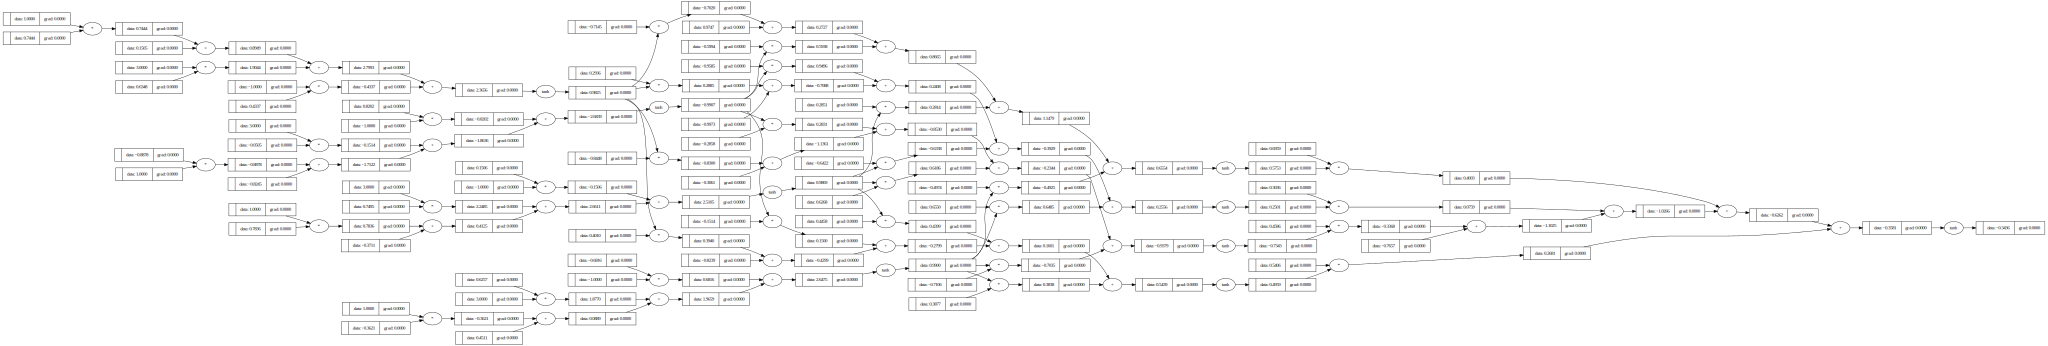

In [11]:
# creating a neural network following the architecture in the above image
x = [1.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
out = n(x)
draw_dot(out)

In [12]:
# and both looks cool! and we are successful with out noob-version!